In [1]:
import pandas as pd
import numpy as np

In [2]:
MDS=pd.read_csv('diabetes.csv')

In [3]:
MDS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
MDS.shape

(768, 9)

In [5]:
MDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
MDS["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
MDS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


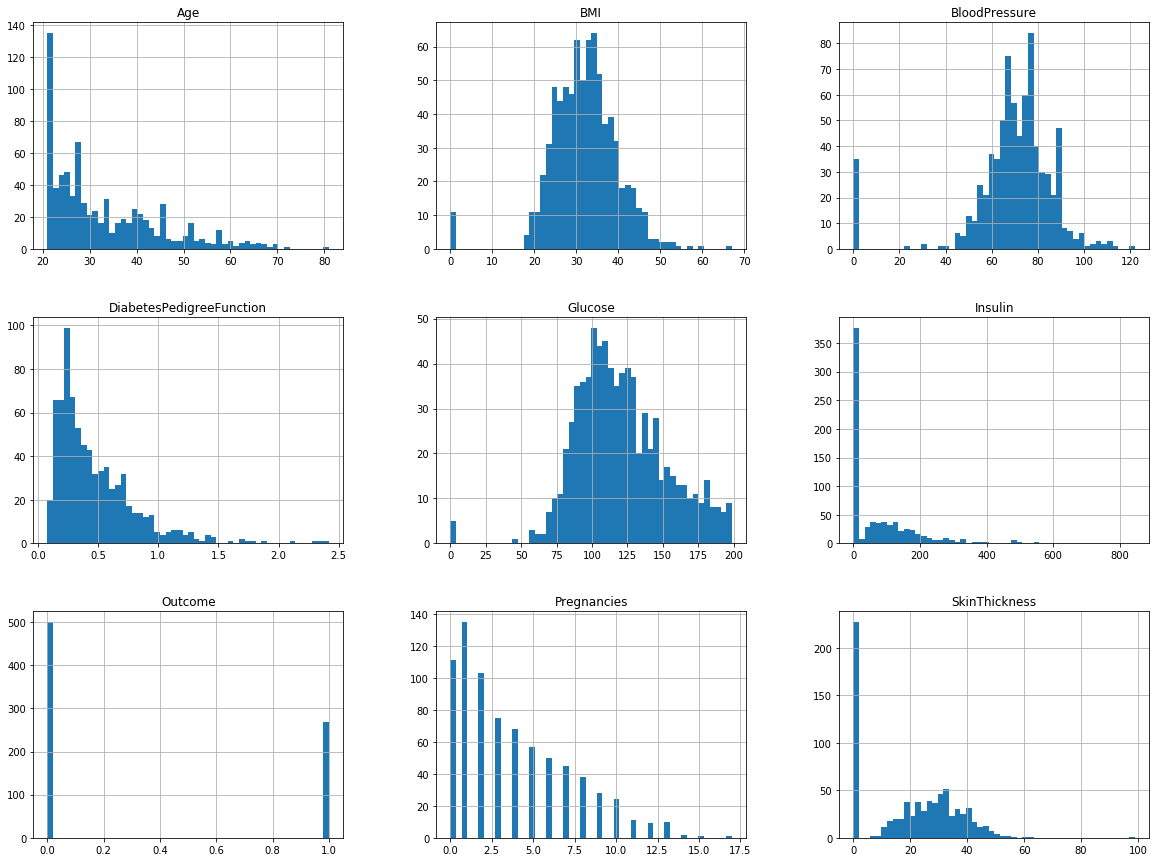

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
MDS.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
corr_matrix = MDS.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [ ]:
X_labels=MDS[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_labels=MDS[['Outcome']]
X=X_labels.values
y=y_labels.values
print(f'X has shape = {X.shape} and y has shape = {y.shape}')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train has shape = {X_train.shape}\n X_test has spape = {X_test.shape}\n y_train has shape = {y_train.shape}\n y_test has shape = {y_test.shape}')

X_train has shape = (614, 8)
 X_test has spape = (154, 8)
 y_train has shape = (614, 1)
 y_test has shape = (154, 1)


In [8]:
print(X_train) 

[[  2.     84.      0.    ...   0.      0.304  21.   ]
 [  9.    112.     82.    ...  28.2     1.282  50.   ]
 [  1.    139.     46.    ...  28.7     0.654  22.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [21]:
#Rescaling data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
X_train_res = scaler.fit_transform(X_train) 
  
# View the transformed data
np.set_printoptions(precision=3) 
print(X_train_res) 

[[0.118 0.422 0.    ... 0.    0.096 0.   ]
 [0.529 0.563 0.672 ... 0.42  0.514 0.483]
 [0.059 0.698 0.377 ... 0.428 0.246 0.017]
 ...
 [0.588 0.508 0.705 ... 0.68  0.452 0.283]
 [0.    0.709 0.    ... 0.632 0.054 0.133]
 [0.    0.628 0.787 ... 0.335 0.079 0.   ]]


In [22]:
print(f'Mean of X_train_res = {np.mean(X_train_res)} Standard Deviation = {np.std(X_train_res)}')

Mean of X_train_res = 0.33232896445593174 Standard Deviation = 0.25056589253777667


In [23]:
#Rescaling data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train) 
X_train_res = scaler.transform(X_train) 

# View the transformed data
np.set_printoptions(precision=3) 
print(X_train_res) 



[[-0.526 -1.151 -3.753 ... -4.135 -0.491 -1.036]
 [ 1.588 -0.277  0.68  ... -0.489  2.415  1.487]
 [-0.828  0.567 -1.266 ... -0.425  0.549 -0.949]
 ...
 [ 1.89  -0.62   0.897 ...  1.761  1.981  0.443]
 [-1.131  0.629 -3.753 ...  1.347 -0.785 -0.34 ]
 [-1.131  0.129  1.437 ... -1.226 -0.616 -1.036]]


In [24]:
#The values for each attribute now have a mean value of 0 and a standard deviation of 1.
np.set_printoptions(precision=3)
print(f'Mean of X_train_res = {np.mean(X_train_res)} Standard Deviation = {np.std(X_train_res)}')

Mean of X_train_res = 3.2113291396323746e-16 Standard Deviation = 0.9999999999999999


In [25]:
shuffle_index = np.random.permutation(614)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train)

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
predicted=sgd.predict(X_test)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
print(n_correct / len(y_pred))

[0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.348 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.348 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.348 0.652 0.652 0.652 0.652 0.652
 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.652 0.

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [35]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, predicted) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, predicted))
print('Report : ')
print(classification_report(y_test, predicted))

Confusion Matrix :
[[84 15]
 [28 27]]
Accuracy Score : 0.7207792207792207
Report : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        99
           1       0.64      0.49      0.56        55

    accuracy                           0.72       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neighbors = list(range(1, 50, 2))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_res, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConv

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConv

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConv

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConv

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConv

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConv

The optimal number of neighbors is 47


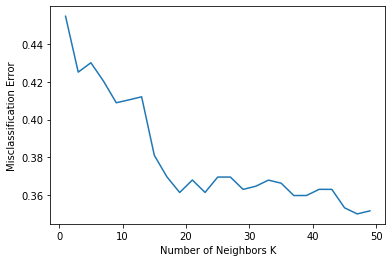

In [27]:
import matplotlib.pyplot as plt
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=47)
model.fit(X_train, y_train)
submission=model.predict(X_test)

In [20]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, score) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, score))
print('Report : ')
print(classification_report(y_test, score))

Confusion Matrix :
[[85 14]
 [21 34]]
Accuracy Score : 0.7727272727272727
Report : 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, score)) 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [16]:
submission

array([[0.46153846],
       [0.30769231],
       [0.30769231],
       [0.30769231],
       [0.46153846],
       [0.46153846],
       [0.07692308],
       [0.46153846],
       [0.53846154],
       [0.53846154],
       [0.61538462],
       [0.76923077],
       [0.38461538],
       [0.        ],
       [0.        ],
       [0.46153846],
       [0.07692308],
       [0.        ],
       [0.76923077],
       [0.30769231],
       [0.53846154],
       [0.07692308],
       [0.46153846],
       [0.07692308],
       [0.53846154],
       [1.        ],
       [0.07692308],
       [0.07692308],
       [0.15384615],
       [0.15384615],
       [0.69230769],
       [0.53846154],
       [0.69230769],
       [0.69230769],
       [0.30769231],
       [0.61538462],
       [0.92307692],
       [0.38461538],
       [0.23076923],
       [0.69230769],
       [0.        ],
       [0.46153846],
       [0.53846154],
       [0.69230769],
       [0.15384615],
       [0.53846154],
       [0.46153846],
       [0.153

In [17]:
score=[]
for pred in submission:
    if pred>=0.5:
        score.append(1)            
    else:
        score.append(0)

In [18]:
np.shape(score)

(154,)